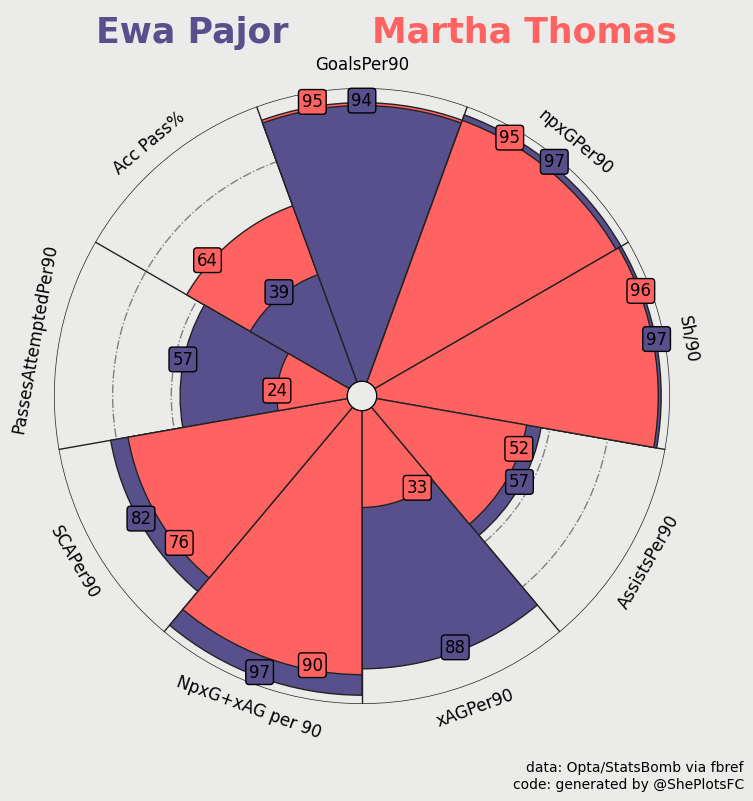

In [6]:
import pandas as pd
import numpy as np
from highlight_text import fig_text
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager

df = pd.read_excel(r"/Users/marclambertes/T7 Women.xlsx", index_col = 0)

# Data preprocessing - you can keep this part
df['Player'] = df['Player'].str.split('\\', expand=True)[0]
#df = df[df['Comp'] == 'FBL']
df = df[df['Pos'].str.contains('FW')]
df = df[df['Min'] > 450]
df['NpxG+xAG per 90'] = df['npxGPer90'] + df['xAGPer90']
df["Acc Pass%"] = (df["PassesCompletedPer90"] / df["PassesAttemptedPer90"]) * 100
df = df[['Player', 'GoalsPer90', 'npxGPer90', 'Sh/90', 'AssistsPer90', 'xAGPer90', 'NpxG+xAG per 90', 'SCAPer90',
         'PassesAttemptedPer90', 'Acc Pass%']]

# Function to handle comparison and return the figure
def compare_players(player1_name, player2_name):
    # Extract parameters and values from your DataFrame
    params = df.columns.tolist()[1:]
    values = []
    compare_values = []
    params_offset = df.columns.tolist()[1:] # Initialize an empty list for offsets

    # Calculate percentile values for each parameter
    for param in params:
        player1_value = df.loc[df['Player'] == player1_name, param].iloc[0]
        player2_value = df.loc[df['Player'] == player2_name, param].iloc[0]

        # Check for NaN values and handle them
        if np.isnan(player1_value) or np.isnan(player2_value):
            values.append(0)
            compare_values.append(0)
        else:
            values.append(math.floor(stats.percentileofscore(df[param].dropna(), player1_value)))
            compare_values.append(math.floor(stats.percentileofscore(df[param].dropna(), player2_value)))

    # Create PyPizza object and set colors
    baker = PyPizza(
        params=params,
        background_color="#EBEBE9",
        straight_line_color="#222222",
        straight_line_lw=1,
        last_circle_lw=1,
        last_circle_color="#222222",
        other_circle_ls="-.",
        other_circle_lw=1
    )
    # Plot pizza
    fig, ax = baker.make_pizza(
        values,
        compare_values=compare_values,
        figsize=(8, 8),
        kwargs_slices=dict(
            facecolor="#58508d",
            edgecolor="#222222",
            zorder=2,
            linewidth=1
        ),
        kwargs_compare=dict(
            facecolor="#ff6361",
            edgecolor="#222222",
            zorder=2,
            linewidth=1,
        ),
        kwargs_params=dict(
            color="#000000",
            fontsize=12,
            va="center"
        ),
        kwargs_values=dict(
            color="#000000",
            fontsize=12,
            zorder=3,
            bbox=dict(
                edgecolor="#000000",
                facecolor="#58508d",
                boxstyle="round,pad=0.2",
                lw=1
            )
        ),
        kwargs_compare_values=dict(
            color="#000000",
            fontsize=12,
            zorder=3,
            bbox=dict(
                edgecolor="#000000",
                facecolor="#ff6361",
                boxstyle="round,pad=0.2",
                lw=1
            )
        )
    )

    baker.adjust_texts(params_offset, offset=-0.17, adj_comp_values=True)

    # Set the color for player1_name to #1A78CF
    fig_text(0.3, 0.95, player1_name, size=25, color="#58508d", va="center", ha="center", weight="bold")
    fig_text(0.715, 0.95, player2_name, size=25, color="#ff6361", va="center", ha="center", weight="bold")
    # Add credits
    CREDIT_1 = "data: Opta/StatsBomb via fbref"
    CREDIT_2 = "code: generated by @ShePlotsFC"
    fig.text(0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=10, color="#000000", ha="right")

    return fig

# Call the function to get the figure
player1_name = "Ewa Pajor"  # Replace with the name of the first player
player2_name = "Martha Thomas"  # Replace with the name of the second player
comparison_figure = compare_players(player1_name, player2_name)

# You can save or display the figure as needed
comparison_figure.savefig("comparison.png")  # Save the figure as an image




In [3]:
import tweepy

ACCESS_KEY = '1645091190021275648-2aF2QtfegDIPPb08gljYszydyF5Bpd'
ACCESS_SECRET = 'kzrnMAdMUq5vedvZ7ZqlczX0ojsL3MTUXsL8qzPpC59SA'
CONSUMER_KEY = '6b6qyiOt42ghG21wBZdvsaLSm'
CONSUMER_SECRET = 'osurgYS98Gh15814ixwlDPLqylQfxma0UDEvE3W586ciMSvDv4'


api = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAHRGnwEAAAAAdqLgF05rZymYirRnjePMyAjOiu4%3DV0cKStwsm5X4ml8rMj2hi3tmaTJnnblH24ijuUcCggl6zjriGB',
                    access_token=ACCESS_KEY,
                    access_token_secret=ACCESS_SECRET,
                    consumer_key=CONSUMER_KEY,
                    consumer_secret=CONSUMER_SECRET)

auth = tweepy.OAuth1UserHandler(
    CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET
)
oldapi = tweepy.API(auth)
media1 = oldapi.media_upload("comparison.png")


api.create_tweet(text='Chloe Kelly vs Lauren James\nPercentile ranks\n2023-2024 T5 EU + NWSL',media_ids=[media1.media_id])


Response(data={'edit_history_tweet_ids': ['1729217034217529724'], 'id': '1729217034217529724', 'text': 'Chloe Kelly vs Lauren James\nPercentile ranks\n2023-2024 T5 EU + NWSL https://t.co/IIEFQ64oRE'}, includes={}, errors=[], meta={})

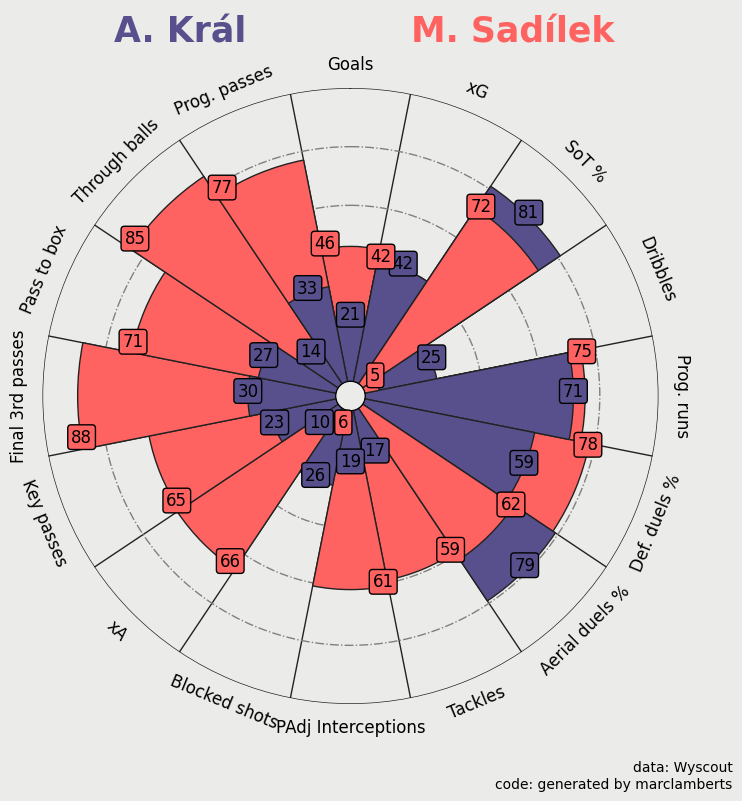

In [10]:
import pandas as pd
import numpy as np
from highlight_text import fig_text
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager

df = pd.read_excel(r"/Users/marclambertes/Python/T7.xlsx")

# Data preprocessing - you can keep this part
#df['Player'] = df['Player'].str.split('\\', expand=True)[0]
#df = df[df['Comp'] == 'FBL']
df = df[df['Position'].str.contains('DMF|CM')]
df = df[df['Minutes played'] > 500]
#df['NpxG+xAG per 90'] = df['npxGPer90'] + df['xAGPer90']
#df["Acc Pass%"] = (df["PassesCompletedPer90"] / df["PassesAttemptedPer90"]) * 100
df = df[['Player', 'Goals per 90', 'xG per 90', 'Shots on target, %', 'Dribbles per 90', 'Progressive runs per 90',
                  'Defensive duels won, %', 'Aerial duels won, %', 'PAdj Sliding tackles', 
         'PAdj Interceptions', 'Shots blocked per 90',
                  'xA per 90', 'Key passes per 90', 'Passes to final third per 90', 'Passes to penalty area per 90',
         'Through passes per 90', 'Progressive passes per 90']]

df = df.rename(columns={'Goals per 90': 'Goals'})
df = df.rename(columns={'xG per 90': 'xG'})
df = df.rename(columns={'Shots on target, %': 'SoT %'})
df = df.rename(columns={'Dribbles per 90': 'Dribbles'})
df = df.rename(columns={'Progressive runs per 90': 'Prog. runs'})
df = df.rename(columns={'Defensive duels won, %': 'Def. duels %'})
df = df.rename(columns={'Aerial duels won, %': 'Aerial duels %'})
df = df.rename(columns={'Shots blocked per 90': 'Blocked shots'})
df = df.rename(columns={'PAdj Sliding tackles': 'Tackles'})
df = df.rename(columns={'PAdj Interception': 'Interceptions'})
df = df.rename(columns={'xA per 90': 'xA'})
df = df.rename(columns={'Key passes per 90': 'Key passes'})
df = df.rename(columns={'Passes to final third per 90': 'Final 3rd passes'})
df = df.rename(columns={'Passes to penalty area per 90': 'Pass to box'})
df = df.rename(columns={'Through passes per 90': 'Through balls'})
df = df.rename(columns={'Progressive passes per 90': 'Prog. passes'})



# Function to handle comparison and return the figure
def compare_players(player1_name, player2_name):
    # Extract parameters and values from your DataFrame
    params = df.columns.tolist()[1:]
    values = []
    compare_values = []
    params_offset = df.columns.tolist()[1:] # Initialize an empty list for offsets

    # Calculate percentile values for each parameter
    for param in params:
        player1_value = df.loc[df['Player'] == player1_name, param].iloc[0]
        player2_value = df.loc[df['Player'] == player2_name, param].iloc[0]

        # Check for NaN values and handle them
        if np.isnan(player1_value) or np.isnan(player2_value):
            values.append(0)
            compare_values.append(0)
        else:
            values.append(math.floor(stats.percentileofscore(df[param].dropna(), player1_value)))
            compare_values.append(math.floor(stats.percentileofscore(df[param].dropna(), player2_value)))

    # Create PyPizza object and set colors
    baker = PyPizza(
        params=params,
        background_color="#EBEBE9",
        straight_line_color="#222222",
        straight_line_lw=1,
        last_circle_lw=1,
        last_circle_color="#222222",
        other_circle_ls="-.",
        other_circle_lw=1
    )
    # Plot pizza
    fig, ax = baker.make_pizza(
        values,
        compare_values=compare_values,
        figsize=(8, 8),
        kwargs_slices=dict(
            facecolor="#58508d",
            edgecolor="#222222",
            zorder=2,
            linewidth=1
        ),
        kwargs_compare=dict(
            facecolor="#ff6361",
            edgecolor="#222222",
            zorder=2,
            linewidth=1,
        ),
        kwargs_params=dict(
            color="#000000",
            fontsize=12,
            va="center"
        ),
        kwargs_values=dict(
            color="#000000",
            fontsize=12,
            zorder=3,
            bbox=dict(
                edgecolor="#000000",
                facecolor="#58508d",
                boxstyle="round,pad=0.2",
                lw=1
            )
        ),
        kwargs_compare_values=dict(
            color="#000000",
            fontsize=12,
            zorder=3,
            bbox=dict(
                edgecolor="#000000",
                facecolor="#ff6361",
                boxstyle="round,pad=0.2",
                lw=1
            )
        )
    )

    baker.adjust_texts(params_offset, offset=-0.17, adj_comp_values=True)

    # Set the color for player1_name to #1A78CF
    fig_text(0.3, 0.95, player1_name, size=25, color="#58508d", va="center", ha="center", weight="bold")
    fig_text(0.715, 0.95, player2_name, size=25, color="#ff6361", va="center", ha="center", weight="bold")
    # Add credits
    CREDIT_1 = "data: Wyscout"
    CREDIT_2 = "code: generated by marclamberts"
    fig.text(0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=10, color="#000000", ha="right")

    return fig

# Call the function to get the figure
player1_name = "A. Král"  # Replace with the name of the first player
player2_name = "M. Sadílek"  # Replace with the name of the second player
comparison_figure = compare_players(player1_name, player2_name)

# You can save or display the figure as needed
comparison_figure.savefig("comparison.png")  # Save the figure as an image


